In [1]:
import pandas as pd
import numpy as np
import helpers
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [2]:
# Load BeerAdvocate reviews (with the 'main_group' name, NaN if there is no) 
BA_ratings_without_text_big = pd.read_csv('./data/BeerAdvocate/ratings-big.csv', nrows=8393032)

/tmp/ipykernel_5963/2442568033.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  BA_ratings_without_text_big = pd.read_csv('./data/BeerAdvocate/ratings-big.csv', nrows=8393032)


In [3]:
# Load RateBeer reviews (with the 'main_group' name, NaN if there is no) 
RB_ratings_without_text_big = pd.read_csv('./data/RateBeer/ratings-big.csv', nrows=7122074)

/tmp/ipykernel_5963/4029089998.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  RB_ratings_without_text_big = pd.read_csv('./data/RateBeer/ratings-big.csv', nrows=7122074)


In [4]:
BA_ratings_without_text_big.head(3)

,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,review,year,main_group
0,Régab,142544,Societe des Brasseries du Gabon (SOBRAGA),37262,Euro Pale Lager,4.5,1440064800,nmann08,nmann08.184925,3.25,2.75,3.25,2.75,3.0,2.88,True,2015,NaN
1,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1235127600,StJamesGate,stjamesgate.163714,3.00,3.50,3.50,4.00,3.5,3.67,True,2009,NaN
2,Barelegs Brew,19590,Strangford Lough Brewing Company Ltd,10093,English Pale Ale,4.5,1142247600,mdagnew,mdagnew.19527,4.00,3.50,3.50,4.00,3.5,3.73,True,2006,NaN


In [6]:
BA_ratings_without_text_big_copy = BA_ratings_without_text_big.copy()
RB_ratings_without_text_big_copy = RB_ratings_without_text_big.copy()

In [7]:
ba_main_proportion = 1 - BA_ratings_without_text_big_copy['main_group'].isna().mean()
rb_main_proportion = 1 - RB_ratings_without_text_big_copy['main_group'].isna().mean()

print(f"BeerAdvocate - The proportion of reviews from coorporation beer is {ba_main_proportion:.2%}")
print(f"RateBeer     - The proportion of reviews from coorporation beer is {rb_main_proportion:.2%}")

BeerAdvocate - The proportion of reviews from coorporation beer is 5.47%
RateBeer     - The proportion of reviews from coorporation beer is 5.63%


: 

In [ ]:
ba_main_proportions = BA_ratings_without_text_big_copy.groupby()
['main_group'].isna().mean()


In [7]:
print("RateBeer:")
print(f"Mean of 'apparance' grade: {RB_ratings_without_text_big_copy['appearance'].mean()}")
print(f"Mean of   'aroma'   grade: {RB_ratings_without_text_big_copy['aroma'].mean()}")
print(f"Mean of  'palate'   grade: {RB_ratings_without_text_big_copy['palate'].mean()}")
print(f"Mean of   'taste'   grade: {RB_ratings_without_text_big_copy['taste'].mean()}")
print(f"Mean of  'overall'  grade: {RB_ratings_without_text_big_copy['overall'].mean()}")
print()
print("BeerAdvocate:")
print(f"Mean of 'apparance' grade: {BA_ratings_without_text_big_copy['appearance'].mean()}")
print(f"Mean of   'aroma'   grade: {BA_ratings_without_text_big_copy['aroma'].mean()}")
print(f"Mean of  'palate'   grade: {BA_ratings_without_text_big_copy['palate'].mean()}")
print(f"Mean of   'taste'   grade: {BA_ratings_without_text_big_copy['taste'].mean()}")
print(f"Mean of  'overall'  grade: {BA_ratings_without_text_big_copy['overall'].mean()}")

Mean of 'apparance' grade: 3.9372064658493504
Mean of   'aroma'   grade: 3.86960086379051
Mean of  'palate'   grade: 3.8658587325132214
Mean of   'taste'   grade: 3.903289427476715
Mean of  'overall'  grade: 3.9005285475425473


In [8]:
overall_mean_ratings_all_rb = RB_ratings_without_text_big_copy[RB_ratings_without_text_big_copy['beer_id']==19590]['rating'].mean()
print(f"The overall rating mean for all RateBeer ratings is: {overall_mean_ratings_all_rb}")

overall_mean_ratings_all_ba = BA_ratings_without_text_big_copy[BA_ratings_without_text_big_copy['beer_id']==19590]['rating'].mean()
print(f"The overall rating mean for all BeerAdvocate ratings is: {overall_mean_ratings_all_ba}")

The overall rating mean for all ratings is: 3.845


In [9]:
RB_ratings_size = len(RB_ratings_without_text_big_copy)
BA_ratings_size = len(BA_ratings_without_text_big_copy)
print(f"In RateBeer, there is {RB_ratings_size} ratings")
print(f"In BeerAdvocate, there is {BA_ratings_size} ratings")

In BeerAdvocate, there is 8393032 ratings


Here is the how the beer's style influence ratings:


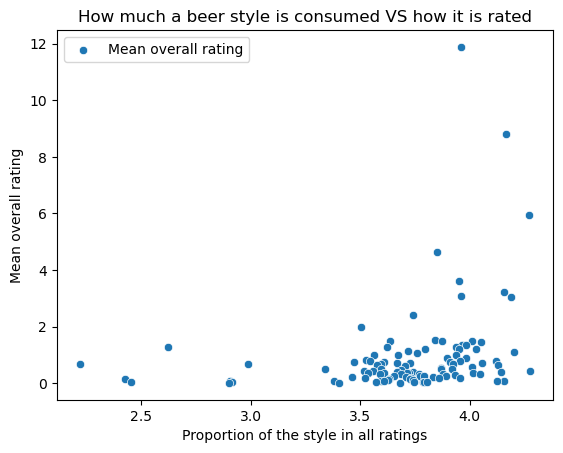

In [14]:
rating_by_style_ba = BA_ratings_without_text_big_copy.groupby('style')['rating'].agg(['mean', ('proportion', lambda x: len(x) / RB_ratings_size*100)]).sort_values(by=['proportion'], ascending=False)
print("Here is the how the beer's style influence ratings:")
rating_by_style_ba.head(3)

sns.scatterplot(data = rating_by_style_ba, x = "mean", y="proportion", label="Mean overall rating")
plt.xlabel("Proportion of the style in all ratings")
plt.ylabel("Mean overall rating")
plt.title("How much a beer style is consumed VS how it is rated")
plt.show()

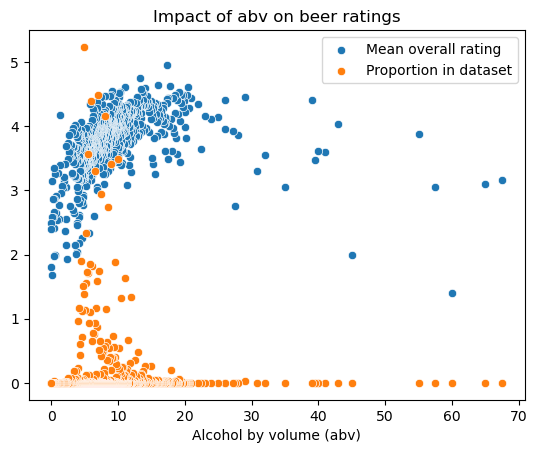

In [15]:
rating_by_abv = RB_ratings_without_text.groupby('abv')['rating'].agg(['mean', ('proportion', lambda x: len(x) / RB_ratings_size*100)]).sort_values(by=['abv'], ascending=False)
rating_by_abv

sns.scatterplot(data = rating_by_abv, x = rating_by_abv.index, y="mean", label="Mean overall rating")
sns.scatterplot(data = rating_by_abv, x = rating_by_abv.index, y="proportion", label="Proportion in dataset")
plt.xlabel("Alcohol by volume (abv)")
plt.ylabel("")
plt.title("Impact of abv on beer ratings")
plt.show()

In [53]:
RB_coorporation = pd.read_csv('./data/BA_groups.csv', usecols=lambda col: col not in ["ind"], sep=',')

RB_coorporation.head(3)

,Unnamed: 0,year,brewery_name,group,main_group
0,0,2004,Companhia Cervejaria Brahma,Inbev,InBev
1,1,2004,Apatinska Pivara A.D.,Inbev,InBev
2,2,2004,Arcense Stoombierbouwerij (Hertog Jan Brouwerij),Inbev,InBev


,Unnamed: 0,year,brewery_name,group,main_group
1447,257,2003,Karlova&#267;ka Pivovara,Heineken,Heineken
1490,330,2004,Karlova&#267;ka Pivovara,Heineken,Heineken
1536,403,2005,Karlova&#267;ka Pivovara,Heineken,Heineken
1588,476,2006,Karlova&#267;ka Pivovara,Heineken,Heineken
1640,549,2007,Karlova&#267;ka Pivovara,Heineken,Heineken
1693,622,2008,Karlova&#267;ka Pivovara,Heineken,Heineken
1758,695,2009,Karlova&#267;ka Pivovara,Heineken,Heineken
1823,768,2010,Karlova&#267;ka Pivovara,Heineken,Heineken
1890,841,2011,Karlova&#267;ka Pivovara,Heineken,Heineken
1960,914,2012,Karlova&#267;ka Pivovara,Heineken,Heineken
